<a href="https://colab.research.google.com/github/kareemullah123456789/AIF/blob/main/ANN_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ==============================
# STEP 1: Import required libraries
# ==============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# ==============================
# STEP 2: Load dataset from Google Drive
# ==============================
#drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/AIF/1_Churn_Modelling.csv")

# Business Problem: Predict whether customers will leave the bank (Exited=1) or not (Exited=0)
data.head()
target = "Exited"
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
# Check for missing values
print(data.isnull().sum())

# Explore categorical variables
print(data.Geography.unique())
print(data.Gender.unique())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
['France' 'Spain' 'Germany']
['Female' 'Male']


In [5]:
# Features and target
x = data.drop([target], axis=1)
y = data[target]

In [6]:
# Identify categorical and numerical columns
drop_columns = ["RowNumber", "CustomerId", "Surname"]
x = x.drop(drop_columns, axis=1)
categorical_cols = x.select_dtypes(include=['object']).columns.to_list()
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns.to_list()
print(categorical_cols, numerical_cols)

['Geography', 'Gender'] ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [7]:
# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

In [8]:
# Train-test split
x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [9]:
x_train = preprocessor.fit_transform(x_train_raw)
x_test = preprocessor.transform(x_test_raw)

In [10]:
x_train.shape[1]

11

3 ReLU hidden layers (20 → 32 → 64 units).

He uniform init for weights.

Single linear output for continuous target.

Compiled with MSE loss and Adam optimizer.

Trains for 100 epochs with 20% validation split.

Practical tuning checklist (order matters)

Scale features.

Tune learning rate (factor of 10 grid). Most important.

Try smaller network first, then increase width/depth if underfitting.

Use EarlyStopping to avoid excess epochs.

Add L2 or Dropout if validation loss diverges.

Try AdamW or SGD+Momentum for better generalization on large data.

Monitor residuals and predictions vs truth scatter.

NameError: name 'model' is not defined

In [14]:
# ==============================
# Build ANN Model
# ==============================
model = Sequential()

# Input + First hidden layer
model.add(Dense(units=16, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_uniform'))

# Second hidden layer
model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))

# Third hidden layer
model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))

# Output layer (sigmoid for binary classification)
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,913 (11.38 KB)

 Trainable params: 2,913 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# ==============================
# Compile the model
# ==============================
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [18]:
# # --- Code cell: callbacks + training with EarlyStopping ---
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# # Early stopping: stop when validation loss stops improving
# es = EarlyStopping(
#     monitor='val_loss',         # what to watch (use 'val_accuracy' if you prefer)
#     patience=8,                 # wait this many epochs with no improvement
#     min_delta=1e-4,             # minimum change to qualify as improvement
#     restore_best_weights=True,  # after stop, keep weights from best epoch
#     verbose=1
# )

# # Reduce LR on plateau: lower LR when val_loss plateaus
# rlp = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,     # LR = LR * factor
#     patience=4,
#     min_lr=1e-6,
#     verbose=1
# )

# # Save best model to disk
# mc = ModelCheckpoint(
#     'best_model.h5',
#     monitor='val_loss',
#     save_best_only=True,
#     verbose=1
# )

# # Fit with callbacks (replace existing model.fit call)
# history = model.fit(
#     x_train, y_train,
#     validation_split=0.2,
#     epochs=50,
#     batch_size=32,
#     verbose=1,
#     callbacks=[es, rlp, mc]
# )

# # Optional: print best epoch info (colab-friendly)
# best_epoch = int(np.argmin(history.history['val_loss']) + 1)
# best_val_loss = np.min(history.history['val_loss'])
# print(f"Best epoch (by val_loss): {best_epoch}, val_loss={best_val_loss:.6f}")


Early stopping stops training when the monitored metric (here val_loss) stops improving.
Key options:
- monitor: which metric to watch. Use 'val_loss' for stable objective or 'val_accuracy' for classification accuracy.
- patience: how many epochs to wait after the last improvement before stopping. Smaller patience stops earlier. Typical: 3–10.
- min_delta: minimum improvement considered significant.
- restore_best_weights: when True the model is returned to the weights from the best epoch.

ReduceLROnPlateau lowers the learning rate when the monitored metric plateaus. This helps escape small plateaus and find finer minima.

ModelCheckpoint saves the best model (by monitored metric) to disk so you can load it later without re-training.

Why use them:
- Avoid wasted epochs once performance stops improving.
- Prevent overfitting by stopping before validation gets worse.
- Automate LR tuning during training.
- Persist the best model automatically.

Tradeoffs and tips:
- If patience is too small you may stop before genuine slow improvements. Set 5–10 for noisy datasets.
- Monitor validation metric, not training metric.
- Combine EarlyStopping + RestoreBestWeights + ModelCheckpoint for safety.
- If training never improves, debug data scaling, architecture, or LR.


In [ ]:
# ==============================
# Train the model
# ==============================
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7996 - loss: 0.5328 - val_accuracy: 0.8325 - val_loss: 0.4321
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4211 - val_accuracy: 0.8363 - val_loss: 0.3897
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.3821 - val_accuracy: 0.8438 - val_loss: 0.3757
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3604 - val_accuracy: 0.8506 - val_loss: 0.3591
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.3538 - val_accuracy: 0.8481 - val_loss: 0.3546
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3534 - val_accuracy: 0.8519 - val_loss: 0.3611
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3429 - val_accuracy: 0.8487 - val_loss: 0.3546
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3398 - val_accuracy: 0.

In [19]:

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     roc_auc_score, average_precision_score, confusion_matrix,
#     classification_report, roc_curve, precision_recall_curve
# )
# import math

# # Choose evaluation set: prefer test, then val, then train
# if 'x_test' in globals() and 'y_test' in globals():
#     X_eval, y_true = x_test, y_test
#     tag = 'test'
# elif 'x_val' in globals() and 'y_val' in globals():
#     X_eval, y_true = x_val, y_val
#     tag = 'val'
# else:
#     X_eval, y_true = x_train, y_train
#     tag = 'train'

# # Ensure arrays
# y_true = np.asarray(y_true).ravel()
# X_eval = np.asarray(X_eval)

# # Validate binary target
# unique_y = np.unique(y_true)
# if not set(unique_y).issubset({0,1}):
#     raise ValueError(f"Target on chosen set ({tag}) is not binary 0/1. Found classes: {unique_y}")

# # Raw model output
# y_raw = model.predict(X_eval)
# y_raw = np.asarray(y_raw).ravel()

# # Convert raw outputs to probabilities and predicted labels
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# # Determine whether outputs are already probabilities, logits, or class labels
# if np.array_equal(y_raw, y_raw.astype(int)) and set(np.unique(y_raw)).issubset({0,1}):
#     probs = None
#     preds = y_raw.astype(int)
# elif np.nanmin(y_raw) >= 0.0 and np.nanmax(y_raw) <= 1.0:
#     # likely probabilities
#     probs = np.clip(y_raw, 0, 1)
#     preds = (probs >= 0.5).astype(int)
# else:
#     # treat as logits or unconstrained scores -> apply sigmoid
#     probs = sigmoid(y_raw)
#     preds = (probs >= 0.5).astype(int)

# # Compute metrics
# metrics = {}
# metrics['accuracy'] = accuracy_score(y_true, preds)
# metrics['precision'] = precision_score(y_true, preds, zero_division=0)
# metrics['recall'] = recall_score(y_true, preds, zero_division=0)
# metrics['f1'] = f1_score(y_true, preds, zero_division=0)

# # ROC AUC & average precision require probabilities and at least two classes present
# if probs is not None and len(unique_y) > 1 and (np.unique(y_true).size == 2):
#     try:
#         metrics['roc_auc'] = roc_auc_score(y_true, probs)
#     except Exception:
#         metrics['roc_auc'] = float('nan')
#     try:
#         metrics['avg_precision'] = average_precision_score(y_true, probs)
#     except Exception:
#         metrics['avg_precision'] = float('nan')
# else:
#     metrics['roc_auc'] = float('nan')
#     metrics['avg_precision'] = float('nan')

# # Show metric table
# df_metrics = pd.DataFrame(metrics, index=[f'{tag}']).T
# display(df_metrics.round(4))

# # Confusion matrix and classification report
# cm = confusion_matrix(y_true, preds)
# print(f"\nConfusion matrix (rows=true, cols=pred) on {tag} set:\n{cm}\n")
# print("Classification report (precision, recall, f1):")
# print(classification_report(y_true, preds, digits=4, zero_division=0))

# # If probabilities available, plot ROC & PR and compute best threshold by F1
# if probs is not None:
#     # ROC
#     fpr, tpr, roc_th = roc_curve(y_true, probs)
#     # PR
#     prec, rec, pr_th = precision_recall_curve(y_true, probs)

#     fig, ax = plt.subplots(1,2, figsize=(12,5))
#     ax[0].plot(fpr, tpr, label=f'ROC AUC = {metrics["roc_auc"]:.4f}')
#     ax[0].plot([0,1],[0,1],'--', linewidth=0.8)
#     ax[0].set_title('ROC curve')
#     ax[0].set_xlabel('False Positive Rate')
#     ax[0].set_ylabel('True Positive Rate')
#     ax[0].legend(loc='lower right')

#     ax[1].plot(rec, prec, label=f'AP = {metrics["avg_precision"]:.4f}')
#     ax[1].set_title('Precision-Recall curve')
#     ax[1].set_xlabel('Recall')
#     ax[1].set_ylabel('Precision')
#     ax[1].legend(loc='lower left')

#     plt.show()

#     # Find best threshold by maximizing F1 (search grid)
#     thr_grid = np.linspace(0.0, 1.0, 101)
#     best_thr, best_f1 = 0.5, metrics['f1']
#     f1_list = []
#     for t in thr_grid:
#         p = (probs >= t).astype(int)
#         f = f1_score(y_true, p, zero_division=0)
#         f1_list.append(f)
#         if f > best_f1:
#             best_f1, best_thr = f, t

#     print(f"Default threshold=0.5 F1 = {metrics['f1']:.4f}")
#     print(f"Best threshold by F1 = {best_thr:.2f} with F1 = {best_f1:.4f}")

#     # Plot F1 vs threshold
#     plt.figure(figsize=(6,3))
#     plt.plot(thr_grid, f1_list, marker='.', linewidth=1)
#     plt.axvline(best_thr, color='C1', linestyle='--', label=f'best thr {best_thr:.2f}')
#     plt.title('F1 vs threshold')
#     plt.xlabel('threshold')
#     plt.ylabel('F1 score')
#     plt.legend()
#     plt.grid(alpha=0.2)
#     plt.show()

# # Show sample true vs prob vs pred (first 15)
# sample_n = min(15, len(y_true))
# if probs is None:
#     sample_df = pd.DataFrame({'true': y_true[:sample_n], 'pred': preds[:sample_n]})
# else:
#     sample_df = pd.DataFrame({'true': y_true[:sample_n], 'prob': probs[:sample_n], 'pred': preds[:sample_n]})
# display(sample_df)

# # Optional: save metrics CSV
# df_metrics.to_csv(f'binary_metrics_{tag}.csv')
# print(f"Metrics saved to binary_metrics_{tag}.csv")


In [ ]:
weights, bias = model.layers[0].get_weights()

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
weights

array([[ 0.9093536 ,  0.17919841,  0.22789004, -0.7555777 , -0.2913165 ,
         0.41806325,  0.07937427,  0.7748592 , -0.05594359, -0.26894012,
        -1.136222  , -0.08424135,  0.44454297, -0.31490913, -0.00207081,
         0.13430567],
       [-0.56306005,  0.72746944,  0.33524373,  0.8196258 ,  0.27822617,
        -0.00774604,  0.7291872 ,  0.31986097,  0.5540162 ,  0.30093887,
         0.411449  ,  0.4584858 , -0.2643253 , -0.00432573, -0.23075719,
         0.5337729 ],
       [-0.2168069 , -0.5261103 , -0.00121209, -0.11076826, -0.1861363 ,
        -0.16034935,  0.75392646, -0.3248911 , -0.1691869 ,  0.3842917 ,
         0.9110233 ,  0.42419195,  0.6693994 ,  0.4074523 ,  0.40073675,
        -0.7593623 ],
       [-0.22663628,  0.09225993, -0.19419648, -0.04716428,  0.02885077,
         0.19612548, -0.00636053, -0.13869616, -0.01064887, -0.04951925,
        -0.11406846,  0.03196922, -0.32963267,  0.653379  , -0.49698853,
         0.5865451 ],
       [ 0.41930547, -0.52821493, -0

In [ ]:
 bias

array([-0.0373496 ,  0.36547828,  0.39188376,  0.2534216 , -0.17080712,
        0.06741191,  0.07138667,  0.18356113, -0.00813349, -0.13482028,
        0.12518026,  0.18880463, -0.06491996,  0.20577395,  0.37797546,
        0.01205343], dtype=float32)

In [ ]:
type(weights)

weights.shape

(11, 16)

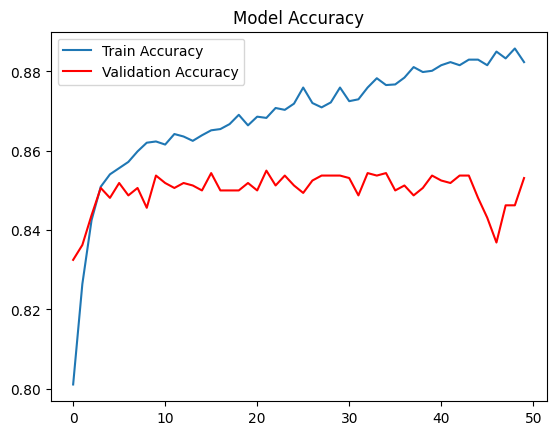

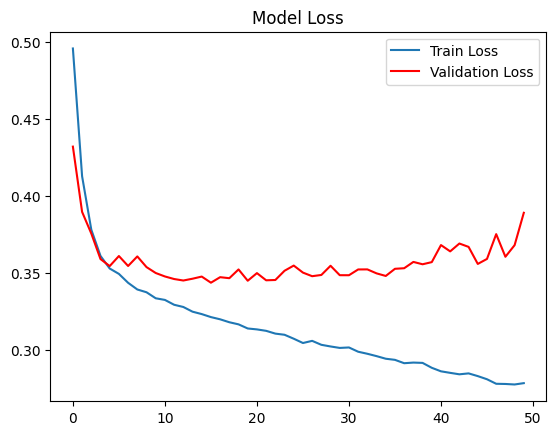

In [ ]:
# ==============================
# Evaluate model
# ==============================
# Training history visualization
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.title("Model Loss")
plt.show()

In [ ]:
# ==============================
# Predictions
# ==============================
y_pred_probs = model.predict(x_test)         # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)    # Convert to 0/1

# Confusion Matrix & Accuracy
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix:
 [[1521   86]
 [ 214  179]]
Test Accuracy: 0.85
